### Student Information
Name:陳則銘

Student ID:M11407W01

GitHub ID:Jimmy030199

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [96]:
### Begin Assignment Here


# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap

# read data 
df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")
df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0


In [47]:
# Data Preparation

from sklearn.utils import Bunch
# 只保留需要的欄位
df_use = pd.read_csv(
    "newdataset/Reddit-stock-sentiment.csv",
    usecols=["title", "text", "sentiment", "upvotes","subjectivity","polarity","label"]
)


# 把需要的欄位轉成 Python list
titles = df_use["title"].tolist()
texts = df_use["text"].tolist()
sentiment = df_use["sentiment"].astype(int).tolist()
upvotes = df_use["upvotes"].tolist()
subjectivity = df_use["subjectivity"].tolist()
polarity = df_use["polarity"].tolist()
# 做一個mapping
labels = df_use["label"].map({-1: 0, 0: 1, 1: 2}).tolist()

# 定義 target_names (情感標籤名稱)
target_names = ["Negative", "Neutral", "Positive"]

# 建立 Bunch 物件
reddit_data = Bunch(
    data=texts,                # 文字內容
    sentiment=sentiment,          # 數值情感標籤
    title=titles,             # 額外資訊
    upvotes=upvotes,
    subjectivity=subjectivity,
    polarity=polarity,
    target=labels,
    target_names=target_names, # 標籤名稱 (對應 -1,0,1)
)

reddit_data


{'data': ['Calls on retards',
  'Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.',
  'Seeing lots of red in the ticker.',
  "Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has achieved the unthinkable – a blazing 116 mph on water! This isn't just about speed; it's about propelling electric boating into a new era. Their cutting-edge technology, combined with Torrente's skill, is making waves that'll ripple for generations.\r\n\r\n**Highlight Main Points**\r\n\r\n* Vision Marine Technologies Inc. achieves a record-breaking 116 mph speed on water with Shaun Torrente.\r\n* The feat highlights the power of electric boating and pushes the limits of innovation.\r\n* Partners like Octillion Power Systems and Danfoss Editron contribute to this groundbreaking achievement.\r\n\r\n**TLDR**\r\n\r\nHold onto your seats – Vision Marine Technologies I

In [48]:
# Let's take a look at some of the records that are contained in our subset of the data
reddit_data.data[0:2]

['Calls on retards',
 'Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.']

In [49]:
reddit_data.target_names

['Negative', 'Neutral', 'Positive']

In [51]:
len(reddit_data.data)

847

In [52]:
len(reddit_data.sentiment)

847

In [54]:
# An example of what the subset contains
print("\n".join(reddit_data.data[0].split("\n")))

Calls on retards


In [55]:
# ... and determine the label of the example via `target_names` key value

print(reddit_data.target_names[reddit_data.target[0]])


Negative


In [56]:
reddit_data.target[0]

0

In [57]:
# category of first 10 documents.
reddit_data.target[0:10]

[0, 1, 1, 2, 0, 1, 0, 1, 2, 2]

In [58]:
for t in reddit_data.target[:10]:
    print(reddit_data.target_names[t])

Negative
Neutral
Neutral
Positive
Negative
Neutral
Negative
Neutral
Positive
Positive


In [60]:
# Answer here
for i in range(3):
    print(f"example {i+1}")
    print("\n".join(reddit_data.data[i].split("\n")))

example 1
Calls on retards
example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
example 3
Seeing lots of red in the ticker.


In [62]:
### 3.1 Converting Dictionary into Pandas Dataframe
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(reddit_data), columns= ['text'])
X

,text
0,Calls on retards
1,Stunt as in like why did they even make a big ...
2,Seeing lots of red in the ticker.
3,Vision Marine Technologies Inc. is rewriting t...
4,He didn’t say thank you.
...,...
842,Invest now it is going to shoot up tomorrow
843,Where can I read this?
844,"Upgrades, Downgrades\r \r [Stock Analyst Reco..."
845,i sold my puts so i expect cheeto to declare w...


In [63]:
len(X)

847

In [64]:
X[0:2]

,text
0,Calls on retards
1,Stunt as in like why did they even make a big ...


In [65]:
for t in X["text"][:2]:
    print(t)

Calls on retards
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.


In [67]:
### Adding Columns

# add category to the dataframe
X['category'] = reddit_data.target
X

,text,category
0,Calls on retards,0
1,Stunt as in like why did they even make a big ...,1
2,Seeing lots of red in the ticker.,1
3,Vision Marine Technologies Inc. is rewriting t...,2
4,He didn’t say thank you.,0
...,...,...
842,Invest now it is going to shoot up tomorrow,2
843,Where can I read this?,1
844,"Upgrades, Downgrades\r \r [Stock Analyst Reco...",1
845,i sold my puts so i expect cheeto to declare w...,0


In [68]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, reddit_data))
X

,text,category,category_name
0,Calls on retards,0,Negative
1,Stunt as in like why did they even make a big ...,1,Neutral
2,Seeing lots of red in the ticker.,1,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,2,Positive
4,He didn’t say thank you.,0,Negative
...,...,...,...
842,Invest now it is going to shoot up tomorrow,2,Positive
843,Where can I read this?,1,Neutral
844,"Upgrades, Downgrades\r \r [Stock Analyst Reco...",1,Neutral
845,i sold my puts so i expect cheeto to declare w...,0,Negative


In [69]:
X[0:10]

,text,category,category_name
0,Calls on retards,0,Negative
1,Stunt as in like why did they even make a big ...,1,Neutral
2,Seeing lots of red in the ticker.,1,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,2,Positive
4,He didn’t say thank you.,0,Negative
5,"Hoping to ejaculate in wet warm puss tonight, ...",1,Neutral
6,Trump will respond to china increasing their t...,0,Negative
7,Confirmed not a trap. Its been like this for p...,1,Neutral
8,Am I the only one seeing the cup & handle brea...,2,Positive
9,HLGN is $10. Hurry and catch it now before it ...,2,Positive


In [71]:
### 3.2 Familiarizing yourself with the Data

# a simple query
X[:10][["category_name"]]

,category_name
0,Negative
1,Neutral
2,Neutral
3,Positive
4,Negative
5,Neutral
6,Negative
7,Neutral
8,Positive
9,Positive


In [74]:
#### Let's query the last 10 records
X[-10:]


,text,category,category_name
837,Finance media lying \r \r *Surprise*,0,Negative
838,I am all in,1,Neutral
839,The Art of the Deal…,1,Neutral
840,Lol fr,1,Neutral
841,So countries “begging to stop the tariffs” and...,2,Positive
842,Invest now it is going to shoot up tomorrow,2,Positive
843,Where can I read this?,1,Neutral
844,"Upgrades, Downgrades\r \r [Stock Analyst Reco...",1,Neutral
845,i sold my puts so i expect cheeto to declare w...,0,Negative
846,![img](emote|t5_2th52|31224),1,Neutral


In [76]:
# using loc (by label)
X.loc[:10, 'text']

0                                      Calls on retards
1     Stunt as in like why did they even make a big ...
2                     Seeing lots of red in the ticker.
3     Vision Marine Technologies Inc. is rewriting t...
4                              He didn’t say thank you.
5     Hoping to ejaculate in wet warm puss tonight, ...
6     Trump will respond to china increasing their t...
7     Confirmed not a trap. Its been like this for p...
8     Am I the only one seeing the cup & handle brea...
9     HLGN is $10. Hurry and catch it now before it ...
10         It's a copy/paste from a Bloomberg terminal.
Name: text, dtype: object

In [77]:
# using iloc (by position)
X.iloc[:10, 0]

0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
5    Hoping to ejaculate in wet warm puss tonight, ...
6    Trump will respond to china increasing their t...
7    Confirmed not a trap. Its been like this for p...
8    Am I the only one seeing the cup & handle brea...
9    HLGN is $10. Hurry and catch it now before it ...
Name: text, dtype: object

In [79]:
print(X[:10][["text","category_name","category"]].query("category == 1"))

                                                text category_name  category
1  Stunt as in like why did they even make a big ...       Neutral         1
2                  Seeing lots of red in the ticker.       Neutral         1
5  Hoping to ejaculate in wet warm puss tonight, ...       Neutral         1
7  Confirmed not a trap. Its been like this for p...       Neutral         1


In [80]:
# Try to fetch records belonging to the ```Neutral ``` category, and query every 10th record. Only show the first 5 records.

print(X[X["category_name"]=="Neutral"][::10][0:5])

                                                 text  category category_name
1   Stunt as in like why did they even make a big ...         1       Neutral
22  Google "target dei".\r \r I did it for you.\r \r          1       Neutral
40  These China AI factory memes are pretty good. ...         1       Neutral
55                                          The steal         1       Neutral
72  A lot of stocks are down right now, and I'm th...         1       Neutral


In [81]:
### 4.1 Missing Values
# check missing values
X.isnull()

,text,category,category_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
842,False,False,False
843,False,False,False
844,False,False,False
845,False,False,False


In [ ]:
# apply() 在 DataFrame 上的預設行為是 axis=0 → 逐欄處理
X.isnull().apply(lambda x: dmh.check_missing_values(x))


,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [ ]:
# axis=1 → x 是「列」，計算每一筆紀錄的缺值數量。
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [ ]:
# 比較差異 筆記
# | 名稱           | 來源         | 維度/性質  | 直觀比喻                                     |
# | **Series**    | Pandas       | 1D        | Excel 的一欄                                |
# | **DataFrame** | Pandas       | 2D        | Excel 的一張表                               |
# | **Bunch**     | scikit-learn | dict-like | 一個打包好的「資料集容器」，可以同時放 data / target / 其他資訊 |



In [93]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])
dummy_series

text        dummy_record
category               1
dtype: object

In [99]:
dummy_dataform = dummy_series.to_frame().T
dummy_dataform

,text,category
0,dummy_record,1


In [101]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
result_with_series

,text,category,category_name
0,Calls on retards,0,Negative
1,Stunt as in like why did they even make a big ...,1,Neutral
2,Seeing lots of red in the ticker.,1,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,2,Positive
4,He didn’t say thank you.,0,Negative
...,...,...,...
843,Where can I read this?,1,Neutral
844,"Upgrades, Downgrades\r \r [Stock Analyst Reco...",1,Neutral
845,i sold my puts so i expect cheeto to declare w...,0,Negative
846,![img](emote|t5_2th52|31224),1,Neutral


In [102]:
# check if the records was commited into result
len(result_with_series)

848

In [103]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [112]:
# 另一種方法
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)
X

,text,category,category_name
0,Calls on retards,0,Negative
1,Stunt as in like why did they even make a big ...,1,Neutral
2,Seeing lots of red in the ticker.,1,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,2,Positive
4,He didn’t say thank you.,0,Negative
...,...,...,...
843,Where can I read this?,1,Neutral
844,"Upgrades, Downgrades\r \r [Stock Analyst Reco...",1,Neutral
845,i sold my puts so i expect cheeto to declare w...,0,Negative
846,![img](emote|t5_2th52|31224),1,Neutral


In [113]:
len(X)

848

In [114]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [ ]:
# 用補值的方式 填補欄位
target_names = ["Negative", "Neutral", "Positive"]
X.loc[X.index[-1], "category_name"] = target_names[X.iloc[-1]["category"]]
X

,text,category,category_name
0,Calls on retards,0,Negative
1,Stunt as in like why did they even make a big ...,1,Neutral
2,Seeing lots of red in the ticker.,1,Neutral
3,Vision Marine Technologies Inc. is rewriting t...,2,Positive
4,He didn’t say thank you.,0,Negative
...,...,...,...
843,Where can I read this?,1,Neutral
844,"Upgrades, Downgrades\r \r [Stock Analyst Reco...",1,Neutral
845,i sold my puts so i expect cheeto to declare w...,0,Negative
846,![img](emote|t5_2th52|31224),1,Neutral


In [118]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))


,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [119]:
len(X)

848

In [120]:
### 4.2 Dealing with Duplicate Data
X.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
843    False
844     True
845    False
846    False
847    False
Length: 848, dtype: bool

In [121]:
sum(X.duplicated())

23

In [122]:
sum(X.duplicated('text'))

23

In [123]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe


In [124]:
len(X)

814

In [125]:
sum(X.duplicated())

0

In [126]:
## 5.  Data Preprocessing
### 5.1 Sampling

X_sample = X.sample(n=100) #random state

In [127]:
len(X_sample)

100

In [128]:
X_sample[0:4]

,text,category,category_name
133,We're too conditioned for instant gratificatio...,0,Negative
366,This is my standard opinion of BlackRock but i...,1,Neutral
446,Can we impeach this clown yet?,0,Negative
356,Significant Share Repurchase Recently.On April...,1,Neutral


category_name
Neutral     392
Negative    315
Positive    107
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

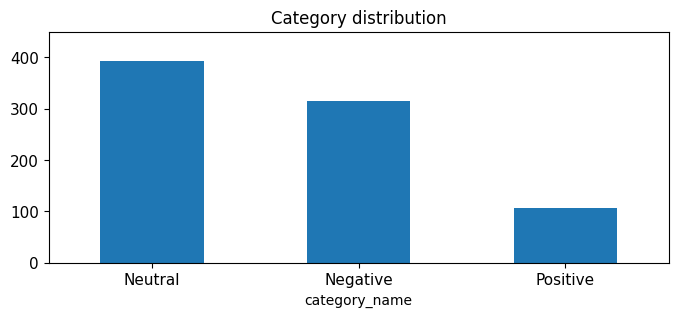

In [130]:
import matplotlib.pyplot as plt
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 450],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

category_name
Negative    47
Neutral     39
Positive    14
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

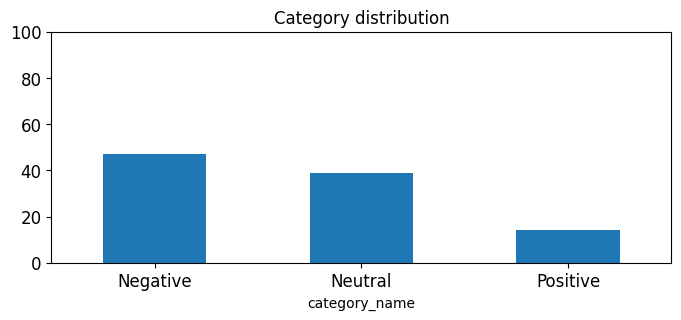

In [ ]:
# X_sample.category_name.value_counts()是Series格式
print(X_sample.category_name.value_counts()) 

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 100], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

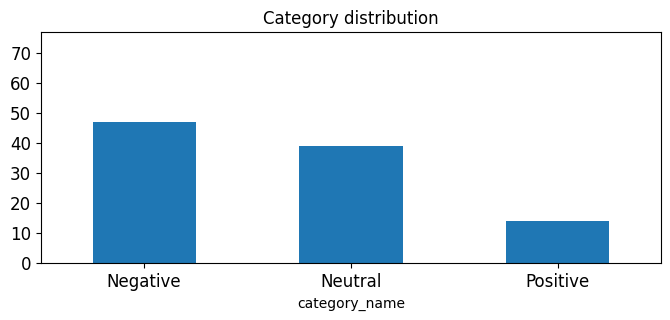

In [133]:
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0,X_sample.category_name.value_counts().max()+30], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

               Full dataset  Sampled dataset
category_name                               
Negative                315               47
Neutral                 392               39
Positive                107               14


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

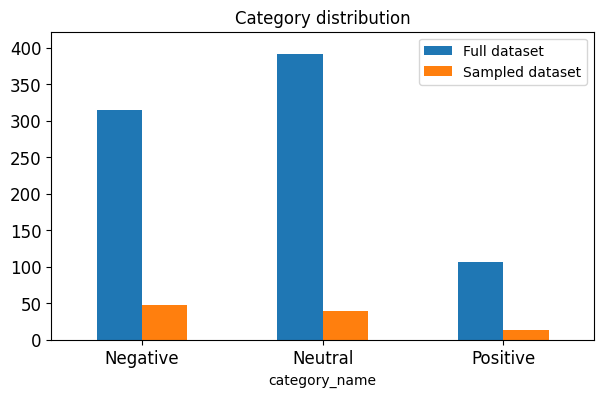

In [134]:
counts_X = X.category_name.value_counts()
counts_sample = X_sample.category_name.value_counts()

comparison_df = pd.DataFrame({
    "Full dataset": counts_X,
    "Sampled dataset": counts_sample
})
print(comparison_df)
comparison_df.plot(
    kind = 'bar',
    title = 'Category distribution',
    ylim = [0,comparison_df.values.max()+30], 
    rot = 0, fontsize = 12, figsize = (7,4)
)

In [135]:
### 5.2 Feature Creation

import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [136]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
X

,text,category,category_name,unigrams
0,Calls on retards,0,Negative,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,1,Neutral,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,1,Neutral,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,2,Positive,"[Vision, Marine, Technologies, Inc., is, rewri..."
4,He didn’t say thank you.,0,Negative,"[He, didn, ’, t, say, thank, you, .]"
...,...,...,...,...
842,Invest now it is going to shoot up tomorrow,2,Positive,"[Invest, now, it, is, going, to, shoot, up, to..."
843,Where can I read this?,1,Neutral,"[Where, can, I, read, this, ?]"
845,i sold my puts so i expect cheeto to declare w...,0,Negative,"[i, sold, my, puts, so, i, expect, cheeto, to,..."
846,![img](emote|t5_2th52|31224),1,Neutral,"[!, [, img, ], (, emote|t5_2th52|31224, )]"


In [137]:
X[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [138]:
list(X[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

In [ ]:
### 5.3 Feature subset selection

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

# X_counts = 稀疏矩陣 (csr_matrix)
# 不是 Series，也不是 DataFrame
# 可以 .toarray() 轉 dense，再丟進 DataFrame
X_counts = count_vect.fit_transform(X.text) 
print(X_counts)

# ex:
#   (0, 123)  1  第 0 筆資料在詞彙表位置 123 出現過 1 次
#   (0, 456)  2  第 0 筆資料件在詞彙表位置 456 出現過 2 次
#   (1, 789)  1  第 1 筆資料件在詞彙表位置 789 出現過 1 次


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 16660 stored elements and shape (814, 4314)>
  Coords	Values
  (0, 689)	1
  (0, 2683)	1
  (0, 3221)	1
  (1, 3669)	1
  (1, 386)	1
  (1, 2006)	2
  (1, 2287)	1
  (1, 4212)	1
  (1, 1157)	1
  (1, 3828)	1
  (1, 1395)	1
  (1, 2379)	1
  (1, 535)	1
  (1, 1073)	1
  (1, 175)	2
  (1, 3601)	1
  (1, 2139)	1
  (1, 3818)	1
  (1, 1552)	1
  (1, 2853)	1
  (1, 2622)	1
  (1, 882)	1
  (1, 3450)	1
  (1, 1398)	2
  (1, 3765)	1
  :	:
  (809, 2642)	1
  (809, 4040)	1
  (809, 2102)	1
  (809, 3891)	1
  (809, 3434)	1
  (810, 3836)	1
  (810, 694)	1
  (810, 4197)	1
  (810, 3087)	1
  (811, 2683)	1
  (811, 3880)	1
  (811, 4143)	1
  (811, 2557)	1
  (811, 3517)	1
  (811, 1429)	1
  (811, 3023)	1
  (811, 3521)	1
  (811, 1088)	1
  (811, 780)	1
  (811, 1124)	1
  (812, 1981)	1
  (812, 1332)	1
  (812, 3746)	1
  (812, 94)	1
  (813, 1260)	1


In [141]:
print(X_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 4314)>
  Coords	Values
  (0, 689)	1
  (0, 2683)	1
  (0, 3221)	1


In [142]:
count_vect.get_feature_names_out()[2683]

'on'

In [143]:
count_vect.get_feature_names_out()[3221]

'retards'

In [144]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [145]:
analyze(X.text[0])

['calls', 'on', 'retards']

In [146]:
# We can check the shape of this matrix by:
X_counts.shape

(814, 4314)

In [150]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [153]:
# we convert from sparse array to normal array
X_counts[0:5, 100:200].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [152]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [167]:
sec_wordFrequency = X_counts[1, 100:200]

# .nonzero()
# 會回傳一個 tuple (row_indices, col_indices)，表示哪些位置不是 0。
# 例如：
# (array([0, 0]), array([5, 27]))
# 意思是：第 0 行的第 5 和第 27 欄有非零值。
col_indices = sec_wordFrequency.nonzero()[1]
print(col_indices)

# 要加100因為從100開始
col_indices_plus_100 = col_indices + 100 
print(col_indices_plus_100)
words = count_vect.get_feature_names_out()[col_indices_plus_100]
print(words[0])


[75]
[175]
about


In [168]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_x

['term_00',
 'term_000',
 'term_01378',
 'term_02',
 'term_027',
 'term_03',
 'term_06',
 'term_08',
 'term_10',
 'term_100',
 'term_1000',
 'term_10000',
 'term_100k',
 'term_100x',
 'term_10k',
 'term_10ks',
 'term_10yr',
 'term_11',
 'term_116',
 'term_118']

In [171]:
# obtain document index
plot_y = ["data_"+ str(i) for i in list(X.index)[0:20]]
plot_y

['data_0',
 'data_1',
 'data_2',
 'data_3',
 'data_4',
 'data_5',
 'data_6',
 'data_7',
 'data_8',
 'data_9',
 'data_10',
 'data_11',
 'data_12',
 'data_13',
 'data_14',
 'data_15',
 'data_16',
 'data_17',
 'data_18',
 'data_19']

In [172]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

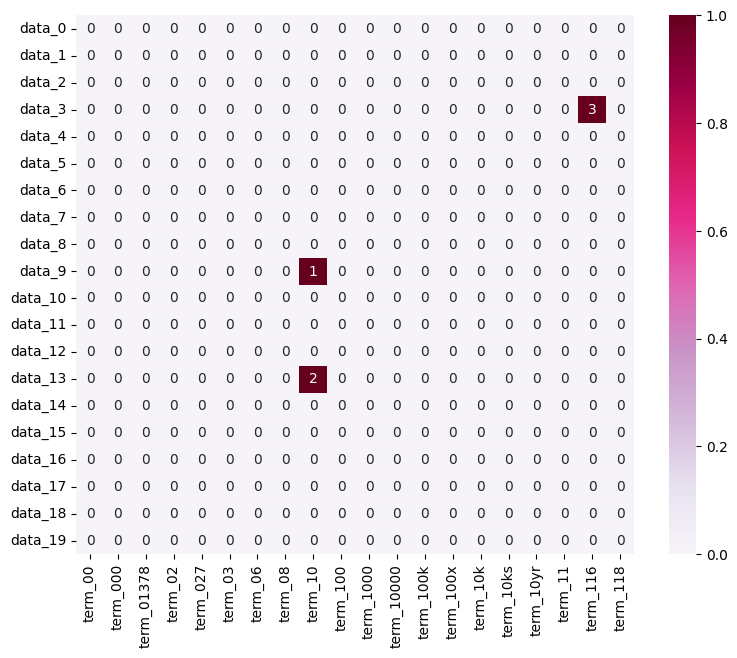

In [173]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

(814, 4314)
(814, 4315)
(3, 4314)
(3, 4314)
               the   to  and   is   it   of   in  that  for  this  you  on  \
category_name                                                                
Negative       304  211  180  133  111  109   94    88   80    66   78  56   
Neutral        385  245  206  182  156  133  136    89   91   100   82  78   
Positive       147   74   63   51   57   46   37    32   31    32   27  29   

               are  they  he  will  with  be  if  as  
category_name                                         
Negative        64    60  53    55    31  50  39  35  
Neutral         55    64  66    55    68  54  61  49  
Positive        32    20   8    12    22  17  16  22  


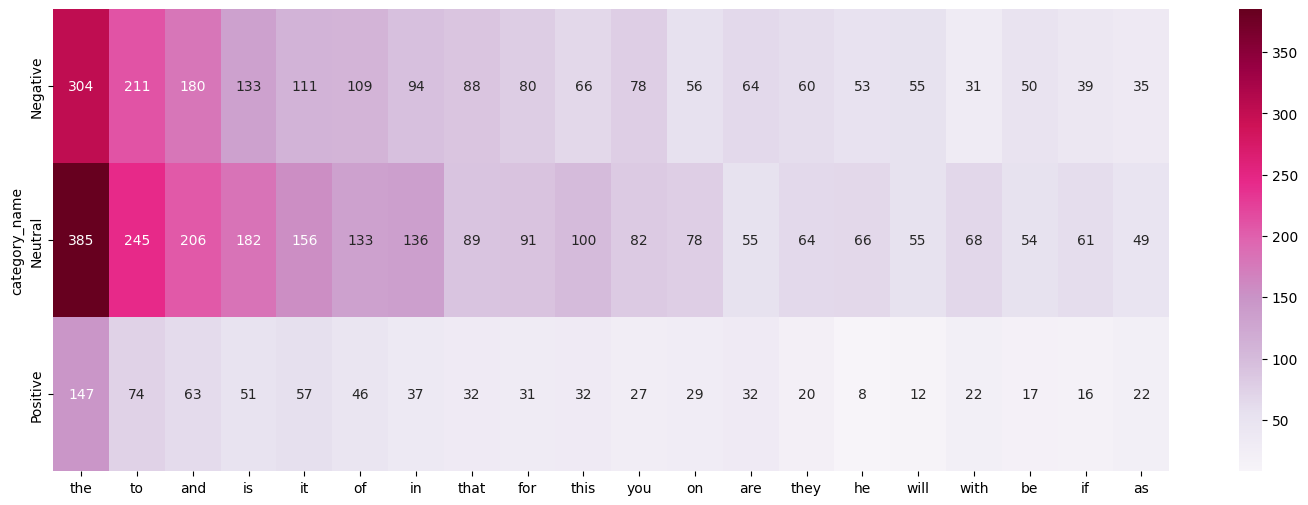

In [180]:
# 依類別聚合試做:
# 1. 計算每個類別的詞頻總和
word_counts = pd.DataFrame(
    X_counts.toarray(),
    columns=count_vect.get_feature_names_out()
)
print(word_counts.shape)
word_counts["category_name"] = X["category_name"]
# print(word_counts)

print(word_counts.shape)
# 依 category 聚合 計算詞頻總和
category_term_matrix = word_counts.groupby("category_name").sum()
print(category_term_matrix.shape)

# 2. 只挑前 20 個高頻詞
# 全部詞彙的總出現次數(回傳Pandas Series)
total_counts = category_term_matrix.sum(axis=0)
# 選出前 20 高頻詞 ex:Index(['python', 'ai', 'god', ...], dtype='object')
top_terms = total_counts.sort_values(ascending=False).head(20).index
print(category_term_matrix.shape)
# 只保留這些詞
category_top_terms = category_term_matrix[top_terms]
print(category_top_terms)

# 3. 畫熱力圖 
plt.figure(figsize=(18, 6))
ax = sns.heatmap(category_top_terms,
                 cmap="PuRd",
                 annot=True, fmt="d")


In [187]:
###  5.4.1 Transform Text Data
term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()
term_frequencies

array([4, 6, 1, ..., 1, 1, 1], shape=(4314,))

In [190]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies

array([4, 6, 1, ..., 1, 1, 1], shape=(4314,))

In [ ]:
term_frequencies[0] 

np.int64(4)

C:\Users\User\AppData\Local\Temp\ipykernel_4444\3140323867.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '01378'),
 Text(3, 0, '02'),
 Text(4, 0, '027'),
 Text(5, 0, '03'),
 Text(6, 0, '06'),
 Text(7, 0, '08'),
 Text(8, 0, '10'),
 Text(9, 0, '100'),
 Text(10, 0, '1000'),
 Text(11, 0, '10000'),
 Text(12, 0, '100k'),
 Text(13, 0, '100x'),
 Text(14, 0, '10k'),
 Text(15, 0, '10ks'),
 Text(16, 0, '10yr'),
 Text(17, 0, '11'),
 Text(18, 0, '116'),
 Text(19, 0, '118'),
 Text(20, 0, '12'),
 Text(21, 0, '1242'),
 Text(22, 0, '125'),
 Text(23, 0, '12855584'),
 Text(24, 0, '13'),
 Text(25, 0, '14'),
 Text(26, 0, '140'),
 Text(27, 0, '145'),
 Text(28, 0, '14th'),
 Text(29, 0, '15'),
 Text(30, 0, '150'),
 Text(31, 0, '153'),
 Text(32, 0, '15m'),
 Text(33, 0, '16'),
 Text(34, 0, '160'),
 Text(35, 0, '17'),
 Text(36, 0, '1700'),
 Text(37, 0, '1728'),
 Text(38, 0, '17th'),
 Text(39, 0, '18'),
 Text(40, 0, '186'),
 Text(41, 0, '18630'),
 Text(42, 0, '1870'),
 Text(43, 0, '1934'),
 Text(44, 0, '1945'),
 Text(45, 0, '1947'),
 Text(46, 0, '1953'),
 Text(47, 0

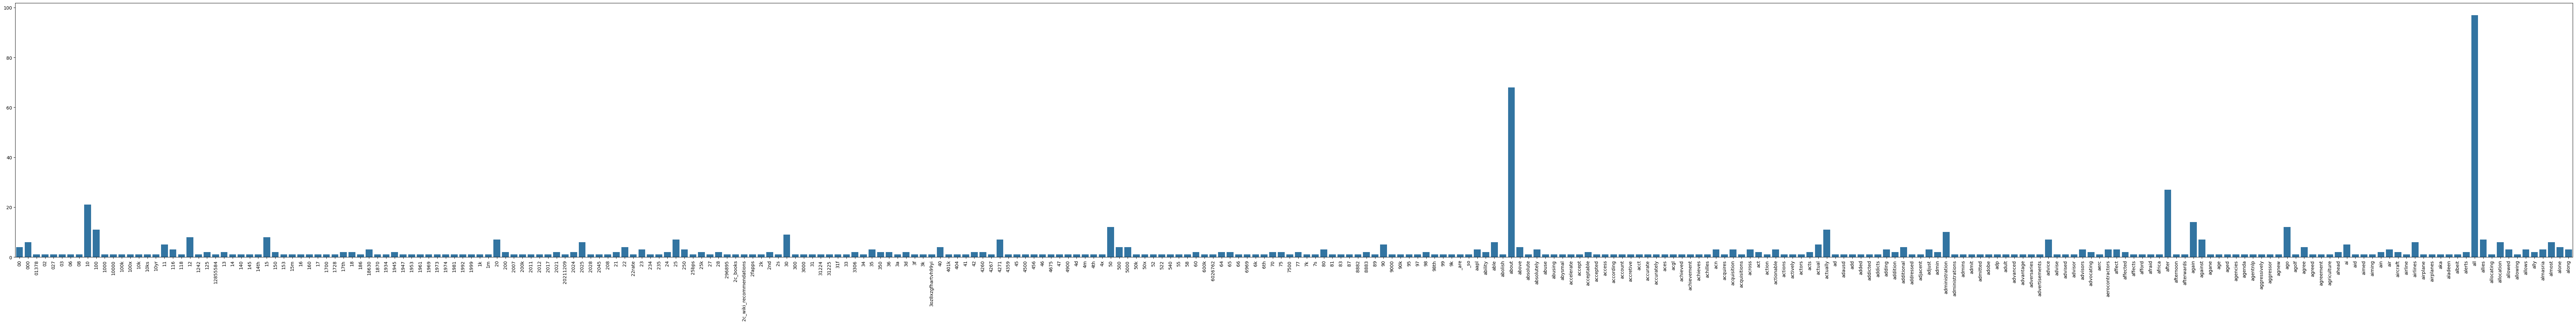

In [ ]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], # X 軸 → 前 300 個詞
            y=term_frequencies[:300]) # Y 軸 → 對應的詞頻

g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [193]:

import plotly.express as px
import pandas as pd

# 建立詞頻表 DataFrame
term_freq_df = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "frequency": term_frequencies
}).sort_values(by="frequency", ascending=False)
# 取前 300 個高頻詞
top_terms = term_freq_df.head(300)
# 用 plotly.express 畫 bar chart
fig = px.bar(top_terms,
             x="term",
             y="frequency",
             title="Top 300 Most Frequent Terms",
             labels={"term": "詞彙", "frequency": "詞頻"},
             template="plotly_white")
# 旋轉 X 軸標籤，避免擠在一起
fig.update_layout(xaxis_tickangle=-45)

# 顯示互動圖
fig.show()

In [196]:
# 設定 最小出現次數 ex:只保留至少出現 50 次的詞：

import plotly.express as px
import pandas as pd

# 建立詞頻表 DataFrame
filtered_terms = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "frequency": term_frequencies
}).sort_values(by="frequency", ascending=False)
filtered_terms = filtered_terms[term_freq_df["frequency"] >= 50]
# 用 plotly.express 畫 bar chart
fig2 = px.bar(filtered_terms,
             x="term",
             y="frequency",
             title="terms in frequency >= 50",
             labels={"term": "詞彙", "frequency": "詞頻"},
             template="plotly_white")
# 旋轉 X 軸標籤，避免擠在一起
fig2.update_layout(xaxis_tickangle=-45)

# 顯示互動圖
fig2.show()

59
11


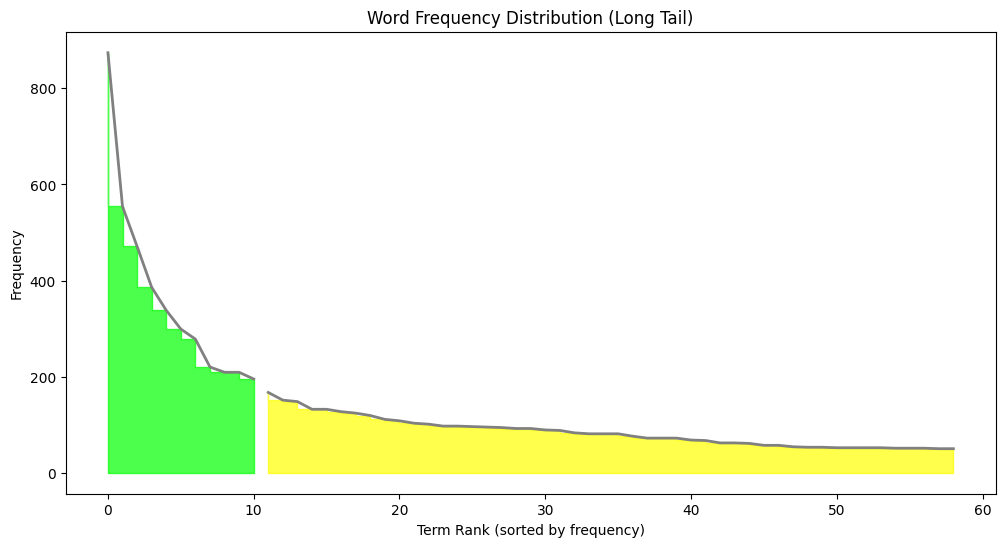

In [199]:

# 先把詞按頻率排序。
# 畫出「詞的排名 vs 詞頻」折線圖。
# 可以加上背景填色（fill_between）或用互動式 Plotly 顯示。


# 建立詞頻 DataFrame
term_freq_df = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "frequency": term_frequencies
}).sort_values(by="frequency", ascending=False).reset_index(drop=True)

filtered_terms = term_freq_df[term_freq_df["frequency"] >= 50]

# cutoff: 定義短頭和長尾的分界點
length = len(filtered_terms)
print(length)
cutoff = int(length * 0.2 )
print(cutoff)

# 畫長尾曲線
plt.figure(figsize=(12,6))
# 短頭 (綠色)
plt.plot(filtered_terms.index[:cutoff], filtered_terms["frequency"][:cutoff], color="gray", linewidth=2)
plt.fill_between(filtered_terms.index[:cutoff], filtered_terms["frequency"][:cutoff],
                 color="lime", alpha=0.7, step="pre")

# 長尾 (黃色)
plt.plot(filtered_terms.index[cutoff:], filtered_terms["frequency"][cutoff:], color="gray", linewidth=2)
plt.fill_between(filtered_terms.index[cutoff:], filtered_terms["frequency"][cutoff:],
                 color="yellow", alpha=0.7, step="pre")

# 美化
plt.title("Word Frequency Distribution (Long Tail)")
plt.xlabel("Term Rank (sorted by frequency)")
plt.ylabel("Frequency")
plt.show()


In [200]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\User\AppData\Local\Temp\ipykernel_4444\1516414146.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '01378'),
 Text(3, 0, '02'),
 Text(4, 0, '027'),
 Text(5, 0, '03'),
 Text(6, 0, '06'),
 Text(7, 0, '08'),
 Text(8, 0, '10'),
 Text(9, 0, '100'),
 Text(10, 0, '1000'),
 Text(11, 0, '10000'),
 Text(12, 0, '100k'),
 Text(13, 0, '100x'),
 Text(14, 0, '10k'),
 Text(15, 0, '10ks'),
 Text(16, 0, '10yr'),
 Text(17, 0, '11'),
 Text(18, 0, '116'),
 Text(19, 0, '118'),
 Text(20, 0, '12'),
 Text(21, 0, '1242'),
 Text(22, 0, '125'),
 Text(23, 0, '12855584'),
 Text(24, 0, '13'),
 Text(25, 0, '14'),
 Text(26, 0, '140'),
 Text(27, 0, '145'),
 Text(28, 0, '14th'),
 Text(29, 0, '15'),
 Text(30, 0, '150'),
 Text(31, 0, '153'),
 Text(32, 0, '15m'),
 Text(33, 0, '16'),
 Text(34, 0, '160'),
 Text(35, 0, '17'),
 Text(36, 0, '1700'),
 Text(37, 0, '1728'),
 Text(38, 0, '17th'),
 Text(39, 0, '18'),
 Text(40, 0, '186'),
 Text(41, 0, '18630'),
 Text(42, 0, '1870'),
 Text(43, 0, '1934'),
 Text(44, 0, '1945'),
 Text(45, 0, '1947'),
 Text(46, 0, '1953'),
 Text(47, 0

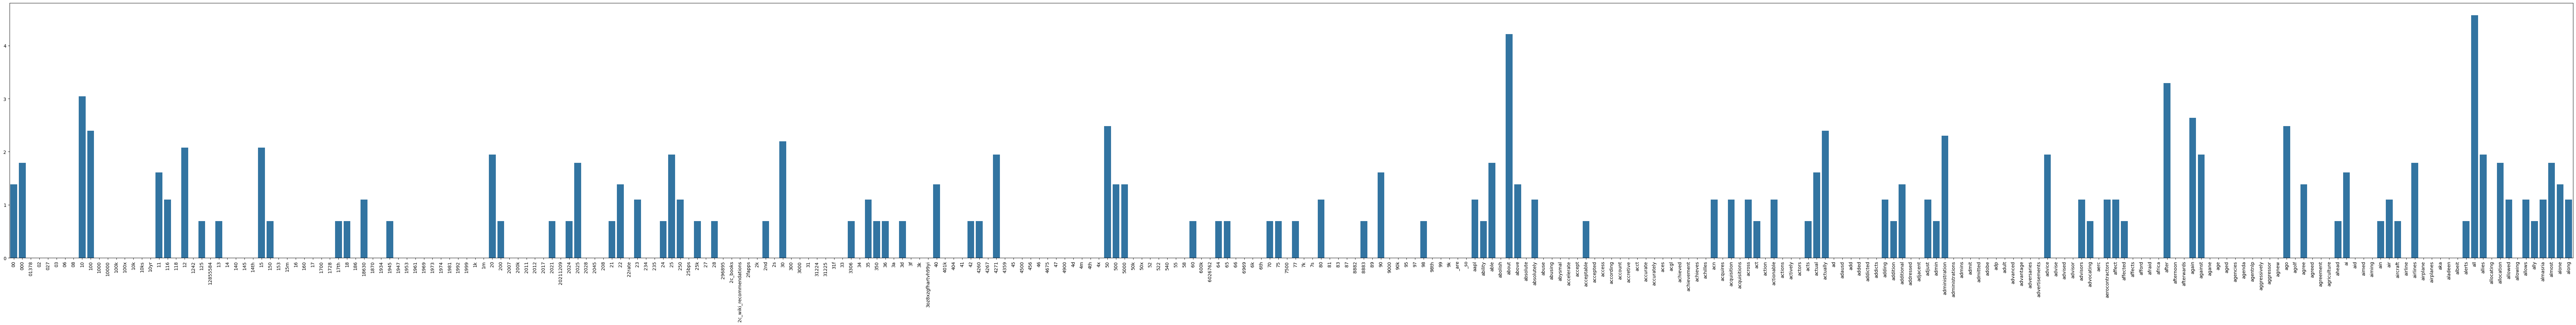

In [201]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

23
4


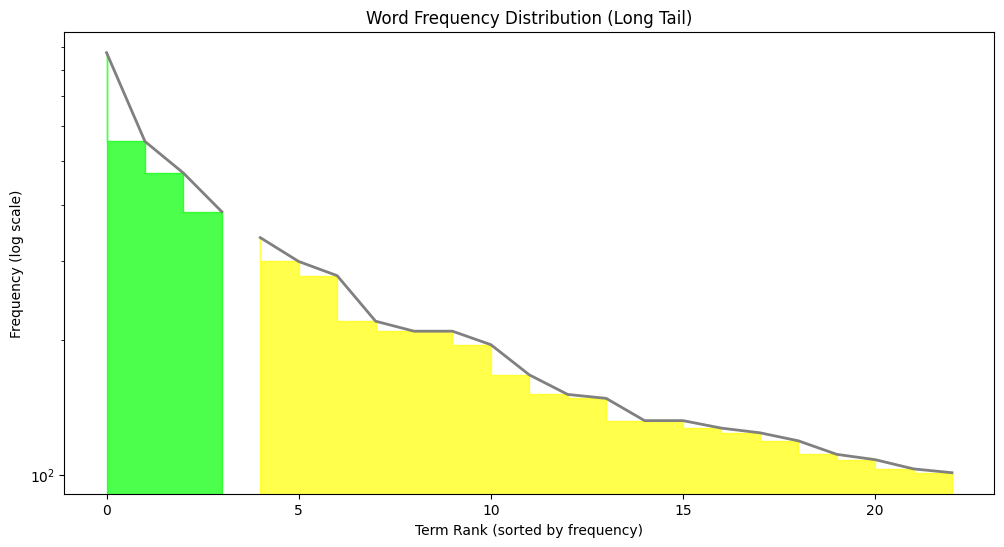

In [209]:

# 先把詞按頻率排序。
# 畫出「詞的排名 vs 詞頻」折線圖。
# 用 log scale 讓「長尾」更明顯。
# 可以加上背景填色（fill_between）或用互動式 Plotly 顯示。


# 建立詞頻 DataFrame
term_freq_df = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "frequency": term_frequencies
}).sort_values(by="frequency", ascending=False).reset_index(drop=True)

filtered_terms = term_freq_df[term_freq_df["frequency"] >= 100]

# cutoff: 定義短頭和長尾的分界點
length = len(filtered_terms)
print(length)
cutoff = int(length * 0.2 )
print(cutoff)



# 畫長尾曲線
plt.figure(figsize=(12,6))
# 短頭 (綠色)
plt.plot(filtered_terms.index[:cutoff], filtered_terms["frequency"][:cutoff], color="gray", linewidth=2)
plt.fill_between(filtered_terms.index[:cutoff], filtered_terms["frequency"][:cutoff],
                 color="lime", alpha=0.7, step="pre")

# 長尾 (黃色)
plt.plot(filtered_terms.index[cutoff:], filtered_terms["frequency"][cutoff:], color="gray", linewidth=2)
plt.fill_between(filtered_terms.index[cutoff:], filtered_terms["frequency"][cutoff:],
                 color="yellow", alpha=0.7, step="pre")

# 美化
plt.yscale("log")   # 改成 log2   # Y 軸取 log，更清楚
plt.title("Word Frequency Distribution (Long Tail)")
plt.xlabel("Term Rank (sorted by frequency)")
plt.ylabel("Frequency (log scale)")
plt.show()


# Phase 2

In [ ]:
### Begin Assignment Here